In [33]:
import numpy as np
def bisection(f):
    accepted_diff = 1*10**(-6)
    lower, upper = 0, 5
    mid = (lower + upper) / 2
    new_y = f(mid)
    actual_diff = 0-new_y
    while (abs(actual_diff) > accepted_diff):
        mid = (lower + upper) / 2
        new_y = f(mid)
        actual_diff = 0-new_y 
        if (new_y > 0):
            upper = mid
        elif (new_y < 0):
            lower = mid
        else:
            return mid
    return(mid)

f = lambda x: np.sin(x) + x**2 - 2 * np.log(x) - 5
bisection(f)

2.4953192472457886

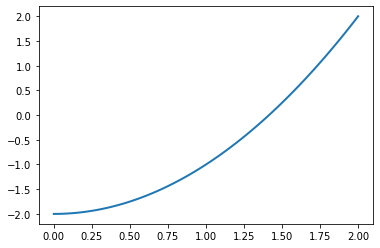

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,2, 100)
y = x**2 - 2
plt.plot(x, y, linewidth = 2.0)

In [35]:
#Write code to implement the Regula Falsi:
# Test your code with x^2 - 2 = 0 in the interval [0, 2]

def Regula_Falsi (f, a, b, tol):
    # f Python function or lambda function
    # a lower bound
    # b upper bound
    # tol is the tolerance
    m = (f(b) - f(a)) / (b - a)
    c = (-f(a)/m) + a
    count = 0
    while (abs(f(c)) > tol):
        if (f(b)*f(c) < 0):
            a = c
        elif (f(a)*f(c) < 0):
            b = c
        elif f(c) == 0:
            return (f(c), count)
        count += 1 
        m = (f(b) - f(a)) / (b - a)
        c = (-f(a)/m) + a
 
    return (c, count)

f = lambda x: x**2 - 2
Regula_Falsi (f, a = 0, b = 2, tol = 1*10**(-6))

(1.4142134998513232, 9)

In [6]:
#Write code to implement the Newton-Raphson method.
import sympy as sym

def newton (f, f_prime, x, tol):
    # f is a differentiable function
    # f_prime is the derivative of f (done by hand)
    # x is initial approximation of the root
    # tol is the tolerance
    
    count = 0
    while (abs(f(x)) > tol):
        x = x - (f(x)/f_prime(x))
        count += 1
    return (float(x), count)

    
f = lambda x: x**2 - 2
x = sym.Symbol("x")
f_prime = lambda x: 2*x
a = 2
newton (f, f_prime, a, tol = 1*10**(-6))

(1.4142135623746899, 4)

In [42]:
import random as rd
#Write code to implement the Secant Method.
def secant (f, a, b, tol):
    # f is differentiable function
    # a and b are close approximations to the root
    # tol is the tolerance
    f_prime = (f(b)-f(a)) / (b-a)
    c = b - (f(b)/f_prime)
    count = 0
    while abs(f(c)) > tol:
        f_prime = (f(b)-f(a)) / (b-a)
        c = b - (f(b)/f_prime)
        a = b
        b = c
        count += 1
    return(c, count)
    
f = lambda x: x**2 - 2
a = rd.uniform(0,2)
b = rd.uniform(0,2)
secant (f, a, b, tol = 1*10**(-6))

(1.4142135450464253, 4)

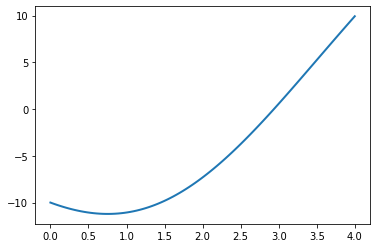

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,4,100)
y = x**2 - np.cos(x) - 3*np.sin(x) - 9
plt.plot(x, y, linewidth = 2.0)

In [21]:
import sympy as sym
f = lambda x: 8*x**7 + 7*x**6 - 48*x**5 + 9*sym.cos(x)
x = sym.Symbol("x")
print(sym.diff(f(x)))

56*x**6 + 42*x**5 - 240*x**4 - 9*sin(x)


[1.2624795027960787, 0.004708021555358267, 2.1568190342661157e-10]


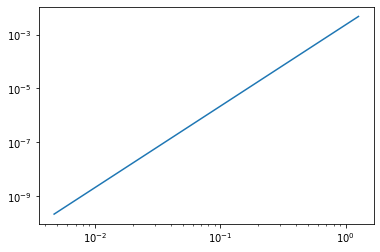

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
def newtown_n2_modified(f, f_prime, f_double_prime, x, tol):
    """An implementation of the 'double' Netwon-Raphson method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        f_prime: hand-calculated derivative of f
        f_double_prime: hand-calculated derivative of f
        x: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    store = []
    while abs(f(x)) > tol:
        x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
        store.append(abs(f(x)))
    return(store)

x = 1
m = lambda x: x**8 + x**7 - 8*x**6 + 9*np.sin(x)
m_prime = lambda x: 8*x**7 + 7*x**6 - 48*x**5 + 9*np.cos(x)
m_double_prime = lambda x: 56*x**6 + 42*x**5 - 240*x**4 - 9*np.sin(x)
tol=1e-6

error = newtown_n2_modified(m, m_prime, m_double_prime, x, tol) 
print(error)
plt.loglog(error[:-1],error[1:]) # blue line


/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_5099/872680204.py:4: RuntimeWarning: divide by zero encountered in log
  y = x*np.sin(x) - np.log(x)


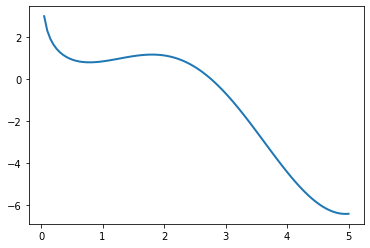

In [56]:
import matplotlib.pyplot as plt

x = np.linspace(0,5, 100)
y = x*np.sin(x) - np.log(x)
plt.plot(x, y, linewidth = 2.0)

In [55]:
from scipy.optimize import fsolve
import numpy as np
f = lambda x: x*np.sin(x) - np.log(x)
fsolve(f, 3, full_output = 1)

(array([2.76492175]),
 {'nfev': 8,
  'fjac': array([[-1.]]),
  'r': array([2.56493214]),
  'qtf': array([1.10844667e-12]),
  'fvec': array([-2.22044605e-16])},
 1,
 'The solution converged.')

In [68]:
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
print(fsolve(f, 3))
print(fsolve(f, 3, fprime = f_prime))
print(fsolve(f, 3, col_deriv = 1))
print(fsolve(f, 3, xtol = 1*10**(-6)))
print(fsolve(f, 3, maxfev = 100))

[1.41421356]
[1.41421356]
[1.41421356]
[1.41421356]
[1.41421356]
